In [1]:
from ipywidgets import interact, interactive, IntSlider, Layout, interact_manual
import ipywidgets as widgets
from IPython.display import display

import numpy as np
import pandas as pd
import mpld3
mpld3.enable_notebook()

import matplotlib.pyplot as plt
#%matplotlib inline

import glob



In [2]:
def load_dflist_txt(txt_namelist):
    return [pd.read_csv(filename, sep='\t', header=None, names = ["Raman shift, cm^{-1}",  filename[:len(filename)-4]])
            for filename in txt_namelist]
    
def load_dflist_hdfs(size, file_name_ptrn='G:/big data Raman/hfcvd/data_{:02}.h5', **kwarg):
    dflist = []
    for i in range(size):
        dflist.append(pd.read_hdf(file_name_ptrn.format(i+1), 'df{:02d}'.format(i+1), **kwarg))
#         df.to_hdf(file_name_ptrn.format(i+1), 'df{:02d}'.format(i+1), **kwarg)
    return dflist

def load_dflist_single_hdfs(size, file_name='G:/big data Raman/hfcvd/data.h5', **kwarg):
    dflist = []
    for i in range(size):
        dflist.append(pd.read_hdf(file_name, 'df{:02d}'.format(i+1), **kwarg))
#         df.to_hdf(file_name_ptrn.format(i+1), 'df{:02d}'.format(i+1), **kwarg)
    return dflist

def save_dflist_hdfs(dflist, file_name_ptrn='G:/big data Raman/hfcvd/data_{:02}.h5', **kwarg):
    for i, df in enumerate(dflist):
        df.to_hdf(file_name_ptrn.format(i+1), 'df{:02d}'.format(i+1), **kwarg)
    return len(dflist)  

def save_dflist_single_hdfs(dflist, file_name='Raman_Granit.h5', **kwarg):
    for i, df in enumerate(dflist):
        df.to_hdf(file_name, 'df_key{:02d}'.format(i+1), **kwarg)
    return len(dflist)  

In [7]:
txt_namelist = glob.glob("*.txt")
print(len(txt_namelist))
dflist = load_dflist_txt(txt_namelist)
print(len(dflist))

11
11


In [8]:
colorlist = [(102/255, 94/255, 252/255), #blue, 
             (255/255, 175/255, 43/255), #orange, 
             (255/255, 81/255, 152/255), #magenta, 
             (0, 179/255, 0),            #green, 
             (59/255, 217/255, 233/255), #cyan, 
             (188/255, 0, 188/255),      #purple
             (210/255,105/255,30/255),      #chocolate
             (220/255,20/255,60/255), #crimson
             (255/255,215/255,0), #gold
             (65/255,105/255,0), #royalblue
             (75/255,0, 130/255), #indigo
             (135/255,206/255, 250/255) #lightskyblue
            ]  
dflist[5].head()

,"Raman shift, cm^{-1}",graphit_17_C1
0,800.00000,0.000000
1,800.54230,21.889860
2,801.08459,21.834692
3,801.62689,22.613214
4,802.16919,26.542547


In [29]:
def multi_plot(number_per_figure, 
               G = False,
               D=False,
               twoD=False,
               Diamond = False,
               Si = False,
               normMax = False):
    size = (14,5)
    int(len(df_list)/number_per_figure)
    plt.figure(figsize  = size)
    for k in range(int(len(df_list)/number_per_figure)):
        
        ax = plt.gca()
        ax.set(ylabel='Intensity, a.u.')
        ax.set(xlabel=r'Raman shift, cm$^{-1}$')
        
        if G : plt.plot([1580,1580], [0,1000*((-1+1/1000)*normMax+1)],  color=colorlist[1], linewidth = 1) #G-line
        if D : plt.plot([1350,1350], [0,1000*((-1+1/1000)*normMax+1)], color=colorlist[2], linewidth = 1) #D-line
        if twoD : plt.plot([2700,2700], [0,1000*((-1+1/1000)*normMax+1)], color=colorlist[3], linewidth = 1) #2D-line
        if Diamond : plt.plot([1333,1333], [0,1000*((-1+1/1000)*normMax+1)], color=colorlist[4], linewidth = 1) #Diamond-line
        if Si : plt.plot([972,972], [0,1000*((-1+1/1000)*normMax+1)], color=colorlist[5], linewidth = 1) #Si-line
        if Si : plt.plot([520,520], [0,1000*((-1+1/1000)*normMax+1)], color=colorlist[5], linewidth = 1) #Si-line  
        # ax.annotate('local max', xy=(2, 1), xytext=(3, 1.5), arrowprops=dict(facecolor='black', shrink=0.05))
        for n in range(number_per_figure):
#         (-1+1/df_list[k*number_per_figure + n].iloc[:,1].max())*normMax + 1 instead df_list[k*number_per_figure + n].iloc[:,1]
            plt.plot(df_list[k*number_per_figure + n].iloc[:,0], df_list[k*number_per_figure + n].iloc[:,1].multiply((-1+1/df_list[k*number_per_figure + n].iloc[:,1].max())*normMax+1),
                     label = df_list[k*number_per_figure + n].columns[1] + "_" + str(k*number_per_figure + n),
                     color=colorlist[(k*number_per_figure + n)%len(colorlist)])
        ax.legend(loc='upper center', bbox_to_anchor=(1.01, 1.05), ncol=1, fancybox=True, shadow=True, title = "File_name and index in list")
        plt.figure(figsize  = size)
    
    
    for k in range(len(df_list)%number_per_figure):
#         df_list[-1-k].plot()
        
        ax = plt.gca()
        ax.set(ylabel='Intensity, a.u.')
        ax.set(xlabel=r'Raman shift, cm$^{-1}$')
        
        if G : plt.plot([1580,1580], [0,1000*((-1+1/1000)*normMax+1)],  color=colorlist[1], linewidth = 1) #G-line
        if D : plt.plot([1350,1350], [0,1000*((-1+1/1000)*normMax+1)], color=colorlist[2], linewidth = 1) #D-line
        if twoD : plt.plot([2700,2700], [0,1000*((-1+1/1000)*normMax+1)], color=colorlist[3], linewidth = 1) #2D-line
        if Diamond : plt.plot([1333,1333], [0,1000*((-1+1/1000)*normMax+1)], color=colorlist[4], linewidth = 1) #Diamond-line
        if Si : plt.plot([972,972], [0,1000*((-1+1/1000)*normMax+1)], color=colorlist[5], linewidth = 1) #Si-line
        if Si : plt.plot([520,520], [0,1000*((-1+1/1000)*normMax+1)], color=colorlist[5], linewidth = 1) #Si-line 
#         (-1+1/df_list[-1-k].iloc[:,1].max())*normMax + 1 instead df_list[-1-k].iloc[:,1]
        plt.plot(df_list[-1-k].iloc[:,0], df_list[-1-k].iloc[:,1].multiply((-1+1/df_list[-1-k].iloc[:,1].max())*normMax+1), label = df_list[-1-k].columns[1] + "_" + str(-1-k),
                 color=colorlist[k%len(colorlist)],
                linewidth = 1.)
        ax.legend(loc='upper center', bbox_to_anchor=(1.01, 1.05), ncol=1, fancybox=True, shadow=True, title="File_name and index in list")
        
    plt.grid(True)
    
    plt.show()


In [17]:
df_list = dflist[::-1]
print("Total number of spectra: ", len(dflist))
print("Total number of spectra for analize: ", len(df_list))

Total number of spectra:  11
Total number of spectra for analize:  11


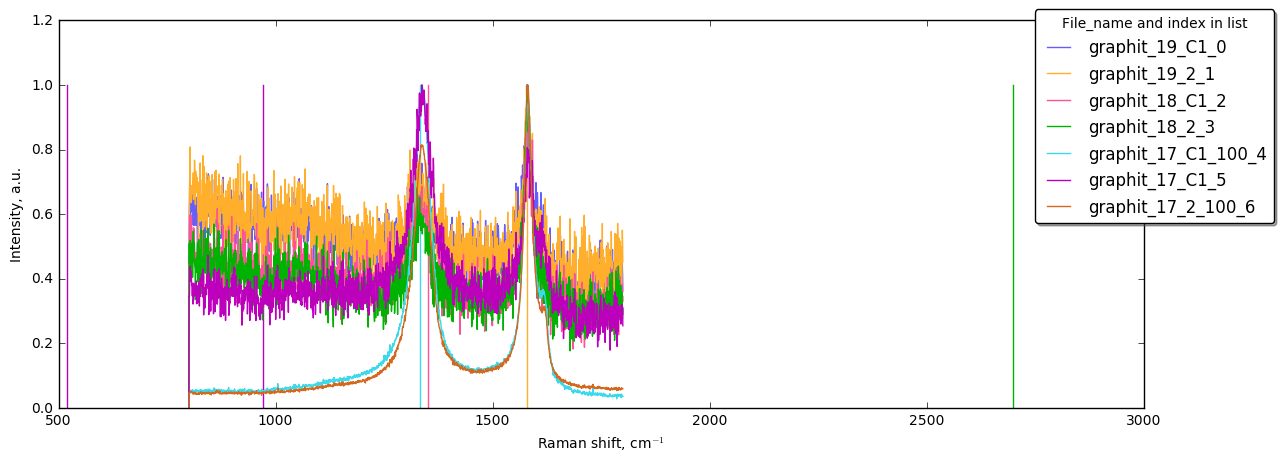

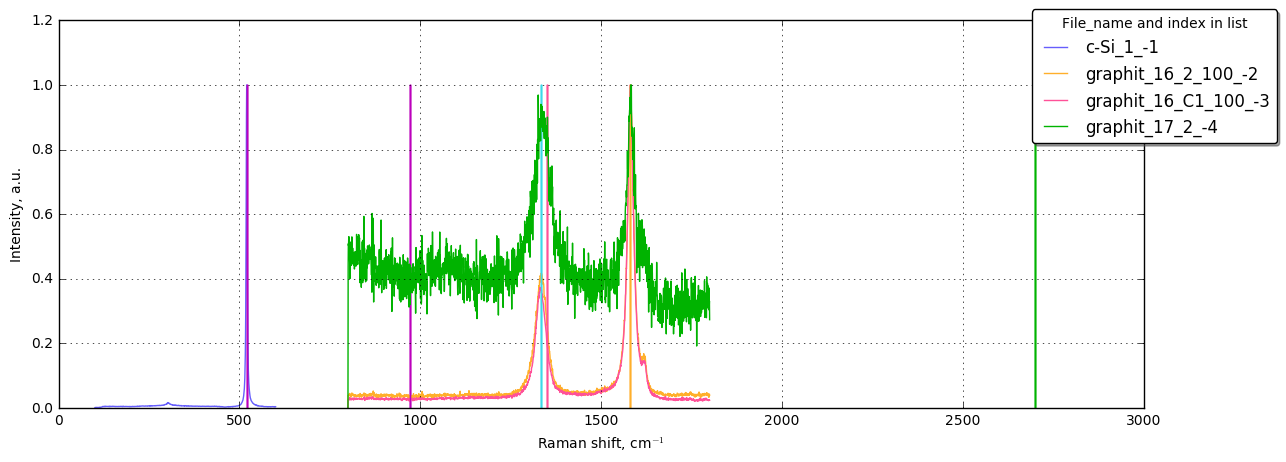

In [30]:
mpld3.enable_notebook()
interact_manual(multi_plot, 
                number_per_figure=widgets.IntSlider(min=1,max=10,step=1,value=10),
                G = widgets.Checkbox(value=False, description='G line 1580', disabled=False),
                D = widgets.Checkbox(value=False, description='D line 1350', disabled=False),
                twoD = widgets.Checkbox(value=False, description='2D line 2700', disabled=False),
                Diamond = widgets.Checkbox(value=False, description='Diamond line 1333', disabled=False),
                Si = widgets.Checkbox(value=False, description='Si line 520', disabled=False),
                normMax = widgets.Checkbox(value=False, description='Devide by MaxIntens', disabled=False))

In [ ]:
dflist = load_dflist_hdfs(len(h5_namelist))
# https://stackoverflow.com/questions/40247963/create-different-pickle-files-iterating-a-list-of-dataframes

In [ ]:
   
dflist[19].head()

<font color = "red" size = "5"> We had some problems with l[19] (a319.txt) and l[368] (a690.txt) </font>



In [ ]:
## Remove problem spectra
del dflist[19]
dflist[19].head()


In [ ]:
## Remove problem spectra
del dflist[367]
dflist[367].head()

In [ ]:
# For testing
my_df = pd.DataFrame(np.array([i for i in range(20)]).reshape(10,2))
df_list = [my_df for i in range(10)]


## Start selection

In [ ]:
# df_list = dflist[:50] # Analyze first 50 spectra
# df_list = dflist[50:100] # Analyze second 50 spectra
# df_list = dflist[100:150] # Analyze next 50 spectra
# df_list = dflist[150:200] # Analyze next 50 spectra
# df_list = dflist[200:250] # Analyze next 50 spectra
# df_list = dflist[250:300] # Analyze next 50 spectra
# df_list = dflist[300:350] # Analyze next 50 spectra
# df_list = dflist[350:400] # Analyze next 50 spectra
# df_list = dflist[400:450] # Analyze next 50 spectra
# df_list = dflist[450:len(dflist)] # Analyze remaining
df_list = dflist[:]
print("Total number of spectra: ", len(dflist))
print("Total number of spectra for analize: ", len(df_list))

In [ ]:
interact_manual(multi_plot, 
                number_per_figure=widgets.IntSlider(min=1,max=10,step=1,value=10),
                G = widgets.Checkbox(value=False, description='G line 1580', disabled=False),
                D = widgets.Checkbox(value=False, description='D line 1350', disabled=False),
                twoD = widgets.Checkbox(value=False, description='2D line 2700', disabled=False),
                Diamond = widgets.Checkbox(value=False, description='Diamond line 1333', disabled=False),
                Si = widgets.Checkbox(value=False, description='Si line 520', disabled=False),
                normMax = widgets.Checkbox(value=False, description='Devide by MaxIntens', disabled=False))
               


<font color = "red" size = "5"> Some part of previous version </font>



In [ ]:
my_dir = "scanme"
namelist = glob.glob(my_dir+"/*.txt")

l = [pd.read_csv(filename, sep='\t', header=None, names = ["Raman shift, cm^{-1}",  filename[len(my_dir)+1:len(filename)-4]]) for filename in namelist]

# ************** Make niceLook and dynamic pick *******************
colorlist = [(102/255, 94/255, 252/255), #blue, 
             (255/255, 175/255, 43/255), #orange, 
             (255/255, 81/255, 152/255), #magenta, 
             (0, 179/255, 0),            #green, 
             (59/255, 217/255, 233/255), #cyan, 
             (188/255, 0, 188/255),      #purple
             (210/255,105/255,30/255),      #chocolate
             (220/255,20/255,60/255), #crimson
             (255/255,215/255,0), #gold
             (65/255,105/255,0), #royalblue
             (75/255,0, 130/255), #indigo
             (135/255,206/255, 250/255) #lightskyblue
            ]     


fig, ax = plt.subplots()

ax.set(ylabel='Intensity, a.u.')

plt.axvline(x=1580, picker=1) #G-line
plt.axvline(x=1350, picker=2) #D-line
plt.axvline(x=2700, picker=3) #2D-line
plt.axvline(x=1333, picker=4) #Dimaond-line
plt.axvline(x=972, picker=5) #Si-line (one more is 520)
# ax.annotate('local max', xy=(2, 1), xytext=(3, 1.5), arrowprops=dict(facecolor='black', shrink=0.05))

for a in range(len(l)):
    l[a].plot(ax=ax, subplots=True, x='Raman shift, cm^{-1}', ms=10, lw=2, alpha=0.7, color=colorlist[a%len(colorlist)])



plt.legend(loc="upper right")
plt.title("Raman spectra from parced files")
ax.set_xlabel('Raman shift, cm$^{-1}$')
ax.grid(True)
ax.legend(loc='upper center', bbox_to_anchor=(1.5, 1.05),
          ncol=3, fancybox=True, shadow=True)

print(namelist, "\n Number of parsed spectra: " + str(len(namelist)))
plt.show()



In [ ]:
save_dflist_hdfs(l, r'G:/big data Raman/hfcvd/data_{:02}.h5', format='t',
                 complib='blosc', complevel=5)

<font color = "red" size = "5"> We had some problems with l[19] (a319.txt) and l[368] (a690.txt) </font>



In [ ]:
l[19].head(1)

In [ ]:
ax = l[3].plot(x = "Raman shift, cm^{-1}")
plt.axvline(x=1580, picker=1) #G-line
plt.axvline(x=1350, picker=2) #D-line
plt.axvline(x=2700, picker=3) #2D-line
plt.axvline(x=1333, picker=4) #Dimaond-line
plt.axvline(x=972, picker=5) #Si-line (one more is 520)
ax.set_xlabel('Raman shift, cm$^{-1}$')
# https://matplotlib.org/gallery/text_labels_and_annotations/annotation_demo.html#sphx-glr-gallery-text-labels-and-annotations-annotation-demo-py
ax.annotate('angle3,\nangle -90',
            xy=(2.5, -1), xycoords='data',
            xytext=(-80, -60), textcoords='offset points',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle3,angleA=0,angleB=-90"))